In [1]:
import tensorflow as tf
print(tf.__version__)

physical_device = tf.config.experimental.list_physical_devices("GPU")
if len(physical_device) > 0:
    tf.config.experimental.set_memory_growth(physical_device[0], True)

2.2.0


In [2]:
from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()

In [3]:
from sklearn.model_selection import train_test_split
data = diabetes_dataset['data']
targets = diabetes_dataset['target']

targets = (targets - targets.mean(axis=0)) / targets.std()

In [4]:
train_data, test_data, train_targets, test_targets = train_test_split(data, targets,
                                                                      test_size=0.1)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout

In [6]:
model = Sequential([
    Dense(64, input_shape=(train_data.shape[1],), activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                704       
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               16640     
Total params: 17,856
Trainable params: 17,600
Non-trainable params: 256
__________________________________________________

In [8]:
model.add(tf.keras.layers.BatchNormalization(
    momentum=0.95,
    epsilon=0.005,
    axis=-1,
    beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05),
    gamma_initializer= tf.keras.initializers.Constant(value=0.9)
))

In [10]:
model.add(Dense(1))

In [11]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [12]:
history = model.fit(train_data, train_data, epochs=100, validation_split=0.15,
                    batch_size=64, verbose=False)

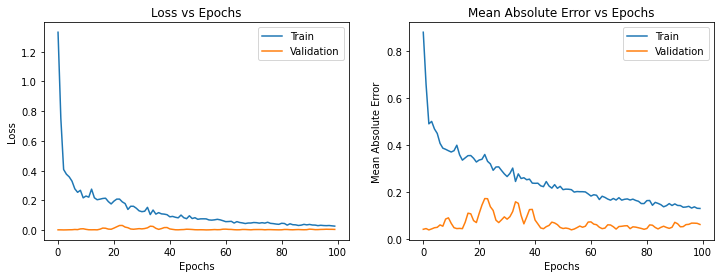

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

frame = pd.DataFrame(history.history)
epochs = np.arange(len(frame))

fig = plt.figure(figsize=(12,4))

# Loss plot
ax = fig.add_subplot(121)
ax.plot(epochs, frame['loss'], label="Train")
ax.plot(epochs, frame['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()

# Accuracy plot
ax = fig.add_subplot(122)
ax.plot(epochs, frame['mae'], label="Train")
ax.plot(epochs, frame['val_mae'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Mean Absolute Error")
ax.set_title("Mean Absolute Error vs Epochs")
ax.legend()